In [1]:
# png_png_512resize_binary_labelsplit_220728 : 1UDxZgD07fQrtR7jTkZRA5upnTo6p2PUZ

In [1]:
!gdown 1UDxZgD07fQrtR7jTkZRA5upnTo6p2PUZ

Downloading...
From: https://drive.google.com/uc?id=1UDxZgD07fQrtR7jTkZRA5upnTo6p2PUZ
To: /content/png_png_512resize_binary_labelsplit_220728.zip
100% 274M/274M [00:01<00:00, 174MB/s]


In [2]:
!unzip /content/png_png_512resize_binary_labelsplit_220728.zip

Archive:  /content/png_png_512resize_binary_labelsplit_220728.zip
   creating: make_data/
   creating: make_data/4/
   creating: make_data/4/masks/
  inflating: make_data/4/masks/a_086.png  
  inflating: make_data/4/masks/a_050.png  
  inflating: make_data/4/masks/d_0243.png  
  inflating: make_data/4/masks/d_0267.png  
  inflating: make_data/4/masks/b_0122.png  
  inflating: make_data/4/masks/d_0256.png  
  inflating: make_data/4/masks/a_063.png  
  inflating: make_data/4/masks/b_0132.png  
  inflating: make_data/4/masks/a_026.png  
  inflating: make_data/4/masks/b_0171.png  
  inflating: make_data/4/masks/a_067.png  
  inflating: make_data/4/masks/d_0307.png  
  inflating: make_data/4/masks/c_71.png  
  inflating: make_data/4/masks/c_33.png  
  inflating: make_data/4/masks/a_069.png  
  inflating: make_data/4/masks/d_0293.png  
  inflating: make_data/4/masks/c_47.png  
  inflating: make_data/4/masks/d_0269.png  
  inflating: make_data/4/masks/c_41.png  
  inflating: make_data/4/masks

In [195]:
from PIL import Image
import numpy as np
import os


images = []
img_dir = '/content/make_data/3/images/'
img_list = os.listdir(img_dir)

for i in img_list:
    dir = img_dir + i
    img = Image.open(dir).convert('L')
    # img = img.reshape()
    # np.append(images, img)
    
    img = np.array(img, dtype=np.int)
    img = np.reshape(img, (1,) + img.shape)
    images.append(img)
    # np.append(images, np.array(img), axis=0)


masks = []
mask_dir = '/content/make_data/3/masks/'
mask_list = os.listdir(mask_dir)

for i in mask_list:
    dir = mask_dir + i
    mask = Image.open(dir).convert('L')
    mask = np.array(mask, dtype=np.int)
    mask = np.where(mask < 255 ,0 , 1 )
    mask = np.reshape(mask, (1,) + mask.shape)
    masks.append(mask)

In [196]:
len(images), len(masks)

(188, 188)

In [197]:
masks[0].shape, images[0].shape

((1, 512, 512), (1, 512, 512))

In [198]:
images

[array([[[159, 158, 158, ..., 216, 216, 216],
         [158, 159, 158, ..., 214, 214, 214],
         [158, 160, 159, ..., 210, 211, 211],
         ...,
         [ 85,  87,  85, ...,  55,  58,  59],
         [ 85,  86,  86, ...,  57,  58,  58],
         [ 86,  84,  85, ...,  54,  57,  56]]]),
 array([[[ 38,  38,  40, ..., 248, 246, 243],
         [ 35,  37,  40, ..., 248, 245, 243],
         [ 37,  39,  41, ..., 247, 244, 243],
         ...,
         [ 62,  64,  64, ..., 134, 130, 127],
         [ 65,  66,  65, ..., 131, 131, 130],
         [ 64,  66,  65, ..., 131, 129, 129]]]),
 array([[[217, 218, 218, ...,  75,  75,  75],
         [218, 218, 218, ...,  75,  75,  75],
         [217, 218, 219, ...,  77,  77,  74],
         ...,
         [159, 160, 157, ..., 159, 159, 158],
         [159, 159, 155, ..., 158, 159, 157],
         [158, 158, 155, ..., 157, 160, 157]]]),
 array([[[172, 176, 190, ...,  76,  77,  76],
         [180, 189, 189, ...,  78,  75,  75],
         [186, 195, 197, ...,

In [199]:
masks[0].max()

1

In [212]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

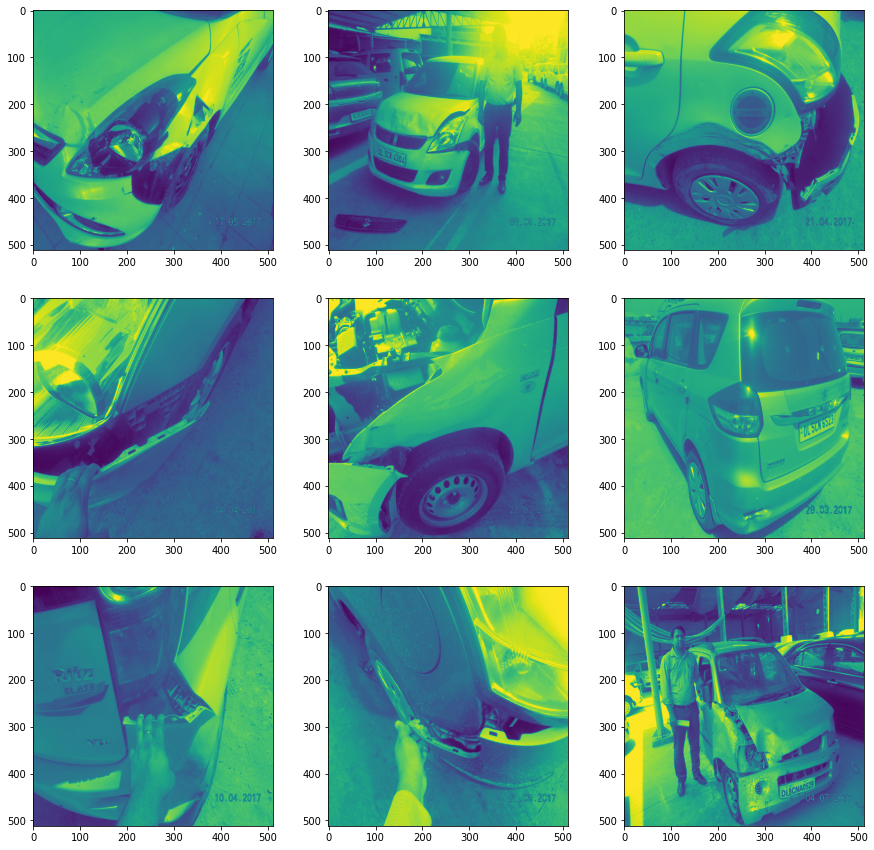

In [213]:
sample_number = 9
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(sample_number):
    subplot = ax[int(i//3), int(i%3)]
    subplot.imshow(images[i][0])
    
plt.show()

In [214]:
trainset = np.column_stack((images, masks))  # shape ( ? , ? )
print(trainset.shape)
# 3064x3x512x512


(188, 2, 512, 512)


In [215]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(trainset, test_size = 0.1)
trainset, validset = train_test_split(trainset, test_size = 0.05)
print('size of trainset, testset and validset is',len(trainset), len(testset), len(validset))

size of trainset, testset and validset is 160 19 9


In [216]:
import torch
import torch.nn as nn

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# device = "cpu"
batch_size = 2
workers = 4
print("device available: ", device)       

device available:  cuda:0


In [217]:
import torchvision.transforms as transform
import torchvision.transforms.functional as TF
import random
from PIL import Image

random.seed(123)

class Resize(object):
    def __init__(self, size=512):
        self.size = size
    
    def __call__(self, sample):
        image, mask = sample
        image = TF.resize(image, size=(self.size, self.size), interpolation=Image.NEAREST)
        mask = TF.resize(mask, size = (self.size, self.size), interpolation=Image.NEAREST)
        return image, mask
    

class toPIL(object):
    def __init__(self):
        pass
    
    def __call__(self, sample):
        image, mask = sample
        image = TF.to_pil_image(image.astype(np.float32))
        mask = TF.to_pil_image(mask.astype(np.float32))
        return image, mask

    
class toTensor(object):
    def __init__(self):
        pass
    
    def __call__(self, sample):
        image, mask = sample
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask
    
    
class Rotate(object):
    def __init__(self, p):
        self.p = p
        
    def __call__(self, sample):
        image, mask = sample
        if random.random() < self.p:
            angle = random.randint(-30, 30)
            image = TF.rotate(image, angle)
            mask = TF.rotate(mask, angle)
        return image, mask
    
    
class Flip(object):
    def __init__(self, p):
        self.p = p
        
    def __call__(self, sample):
        image, mask = sample
        if random.random() < self.p:
            image = TF.hflip(image)
            mask = TF.hflip(mask)
        return image, mask
    

class Crop(object):
    def __init__(self, p):
        self.p = p
    
    def __call__(self, sample):
        image, mask = sample
        if random.random() < self.p:
            size = image.size[1]
            crop_size = random.randint(int(size*0.5), size)
            image = TF.center_crop(image, output_size=crop_size)
            mask = TF.center_crop(mask, output_size=crop_size)
        return image, mask
    
    
class Padding(object):
    def __init__(self, size):
        super(Padding, self).__init__()
        self.size = size
        
    def __call__(self, sample):
        image, mask = sample
        w, h = image.size
        if (w < self.size):
            image = TF.pad(image, padding = (self.size-w)//2, fill=0)
            mask = TF.pad(mask, padding = (self.size-w)//2, fill=0)
        return image, mask
    
class ZoomOut(object):
    def __init__(self, p):
        super(ZoomOut, self).__init__()
        self.p = p
        
    def __call__(self, sample):
        image, mask = sample
        w, h = image.size
        if (random.random() < self.p):
            resize = Resize(random.randint(int(0.5*w), int(.95*w)))
            pad = Padding(w)
            sample = resize(sample)
            sample = pad(sample)
        return sample
    
    
def toNumpy(sample):
    image, mask = sample
    image = np.array(image)
    mask = np.array(mask)
    return image, mask


def normalize(sample):
    image, mask = sample
    m, s = np.mean(image), np.std(image)
    image = (image - m)/s
    return image, mask


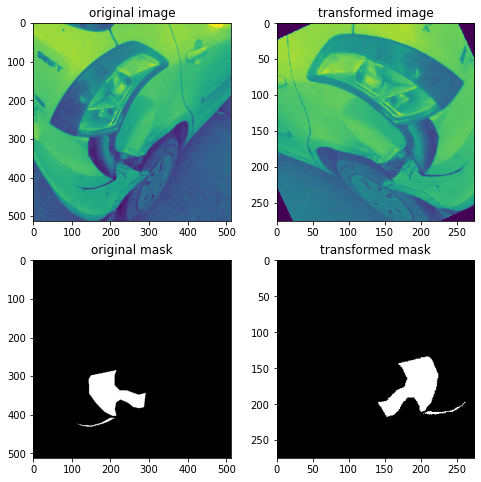

In [218]:
def getTransform(rotate, crop, flip, zoom):
    return transform.Compose([
        Rotate(rotate),
        ZoomOut(zoom),
        Crop(crop),
        Flip(flip),
    ])

func = toPIL()
testimg = func(trainset[0])
trans = getTransform(rotate=1, crop=1, flip=1, zoom=1 )
test = trans(testimg)
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(np.array(testimg[0]))
ax[0, 0].set_title("original image")
ax[0, 1].imshow(np.array(test[0]))
ax[0, 1].set_title('transformed image')
ax[1, 0].imshow(np.array(testimg[1]), cmap='gray')
ax[1, 0].set_title('original mask')
ax[1, 1].imshow(np.array(test[1]), cmap='gray')
ax[1, 1].set_title('transformed mask')
plt.show()

In [219]:
from torch.utils.data import Dataset, DataLoader
input_size = 512
class CarDataset(Dataset):
    def __init__(self, data, train=True, transform=None):
        self.data = data
        self.transform = transform
        self.train = train
        self.data = [normalize(i) for i in self.data]
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        sample = self.data[i]
        
        to_pil = toPIL()
        sample = to_pil(sample)
        
        if self.transform is not None:
            sample = self.transform(sample)
            
        resize_func = Resize(input_size)
        sample = resize_func(sample)
        sample = toNumpy(sample)
        
        image, mask = sample
        # image, mask, label = sample
        # target_label = np.zeros((3, 1, 1))
        # target_label[label-1, 0, 0] = 1
        # label = target_label
                
        image = torch.from_numpy(image.astype(np.float32))
        mask = torch.from_numpy(mask.astype(np.float32))
        # label = torch.from_numpy(label.astype(np.float32))
        
        image = torch.unsqueeze(image, dim = 0).cpu()
        mask = torch.unsqueeze(mask, dim = 0).cpu()

        
        return image, mask
    
trainset = CarDataset(trainset, transform = getTransform(.8, .8, .8, .7)) 
testset  = CarDataset(testset)
validset = CarDataset(validset)

In [229]:
next(iter(trainset))[0].shape

torch.Size([1, 512, 512])

In [220]:
def getDataLoader(dataset, batch = batch_size):
    dataloader = DataLoader(
        dataset, 
        batch_size = batch,
        shuffle = True,
        num_workers = workers
    )
    return dataloader

testLoader  = getDataLoader(testset)
trainLoader = getDataLoader(trainset)
validLoader = getDataLoader(validset)

In [232]:
next(iter(trainLoader))[0].shape

torch.Size([2, 1, 512, 512])

In [177]:
# 딥러닝 프레임워크 Tensorflow에서는 다음 함수를 통해 atrous convolution을 도입할 수 있다: tf.nn.atrous_conv2d

### Unet Basic

In [178]:
import os
import numpy as np

import torch
import torch.nn as nn

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                    kernel_size=kernel_size, stride=stride, padding=padding,
                                    bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # Contracting path
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
       
        # Expansive path

        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        # self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

        

    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)

        dec4_1 = self.dec4_1(enc4_1)
   
        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        # x = self.fc(dec1_1)
        # x = x.cpu().data.numpy().argmax()

        return dec1_1

In [179]:
UNet()

UNet(
  (enc1_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (enc1_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2_1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (enc2_2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

### Unet Basic 2

In [239]:
import os
import numpy as np

import torch
import torch.nn as nn

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):    ## 패딩이 있으면 이미지 사이즈 유지 
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                    kernel_size=kernel_size, stride=stride, padding=padding,
                                    bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # Contracting path
        self.enc1_1 = CBR2d(in_channels=1, out_channels=4)
        # self.dropout = nn.Dropout(0.25)
        self.enc1_2 = CBR2d(in_channels=4, out_channels=4)
        # self.dropout = nn.Dropout(0.25)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=4, out_channels=8)
        # self.dropout = nn.Dropout(0.25)
        self.enc2_2 = CBR2d(in_channels=8, out_channels=8)
        # self.dropout = nn.Dropout(0.25)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=8, out_channels=16)
        # self.dropout = nn.Dropout(0.25)
        self.enc3_2 = CBR2d(in_channels=16, out_channels=16)
        # self.dropout = nn.Dropout(0.25)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=16, out_channels=32)
        # self.dropout = nn.Dropout(0.25)
        self.enc4_2 = CBR2d(in_channels=32, out_channels=32)
        # self.dropout = nn.Dropout(0.25)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=32, out_channels=64)
        # self.dropout = nn.Dropout(0.25)
        self.enc5_2 = CBR2d(in_channels=64, out_channels=64)
        # self.dropout = nn.Dropout(0.25)

        self.pool5 = nn.MaxPool2d(kernel_size=2)

        self.enc6_1 = CBR2d(in_channels=64, out_channels=128)
        # self.dropout = nn.Dropout(0.25)
        self.enc6_2 = CBR2d(in_channels=128, out_channels=128)
        # self.dropout = nn.Dropout(0.25)

        self.pool6 = nn.MaxPool2d(kernel_size=2)

        self.enc7_1 = CBR2d(in_channels=128, out_channels=256)
        # self.dropout = nn.Dropout(0.25)
        # self.enc7_2 = CBR2d(in_channels=256, out_channels=256)
        # self.dropout = nn.Dropout(0.25)

        # self.pool7 = nn.MaxPool2d(kernel_size=2)

        # self.enc8_1 = CBR2d(in_channels=256, out_channels=512)
        # self.dropout = nn.Dropout(0.25)
       
        #Expansive path

        # self.dec8_1 = CBR2d(in_channels=512, out_channels=256)
        # self.dropout = nn.Dropout(0.25)

        # self.unpool7 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
        #                                     kernel_size=2, stride=1, padding=0, bias=True)

        # self.dec7_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        # self.dropout = nn.Dropout(0.25)
        self.dec7_1 = CBR2d(in_channels=256, out_channels=128)
        # self.dropout = nn.Dropout(0.25)

        self.unpool6 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec6_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        # self.dropout = nn.Dropout(0.25)
        self.dec6_1 = CBR2d(in_channels=128, out_channels=64)
        # self.dropout = nn.Dropout(0.25)

        self.unpool5 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec5_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        # self.dropout = nn.Dropout(0.25)
        self.dec5_1 = CBR2d(in_channels=64, out_channels=32)
        # self.dropout = nn.Dropout(0.25)

        self.unpool4 = nn.ConvTranspose2d(in_channels=32, out_channels=32,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 32, out_channels=32)
        # self.dropout = nn.Dropout(0.25)
        self.dec4_1 = CBR2d(in_channels=32, out_channels=16)
        # self.dropout = nn.Dropout(0.25)

        self.unpool3 = nn.ConvTranspose2d(in_channels=16, out_channels=16,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 16, out_channels=16)
        # self.dropout = nn.Dropout(0.25)
        self.dec3_1 = CBR2d(in_channels=16, out_channels=8)
        # self.dropout = nn.Dropout(0.25)

        self.unpool2 = nn.ConvTranspose2d(in_channels=8, out_channels=8,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 8, out_channels=8)
        # self.dropout = nn.Dropout(0.25)
        self.dec2_1 = CBR2d(in_channels=8, out_channels=4)
        # self.dropout = nn.Dropout(0.25)

        self.unpool1 = nn.ConvTranspose2d(in_channels=4, out_channels=4,
                                            kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 4, out_channels=4)
        # self.dropout = nn.Dropout(0.25)
        self.dec1_1 = CBR2d(in_channels=4, out_channels=1)

        # self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

        

    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        # enc1_1 = self.dropout(enc1_1)
        enc1_2 = self.enc1_2(enc1_1)
        # enc1_2 = self.dropout(enc1_2)
        
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        # enc2_1 = self.dropout(enc2_1)
        enc2_2 = self.enc2_2(enc2_1)
        # enc2_2 = self.dropout(enc2_2)

        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        # enc3_1 = self.dropout(enc3_1)
        enc3_2 = self.enc3_2(enc3_1)
        # enc3_2 = self.dropout(enc3_2)

        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        # enc4_1 = self.dropout(enc4_1)
        enc4_2 = self.enc4_2(enc4_1)
        # enc4_2 = self.dropout(enc4_2)

        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)
        # enc5_1 = self.dropout(enc5_1)
        enc5_2 = self.enc5_2(enc5_1)
        # enc5_2 = self.dropout(enc5_2)

        pool5 = self.pool5(enc5_2)

        enc6_1 = self.enc6_1(pool5)
        # enc6_1 = self.dropout(enc6_1)
        enc6_2 = self.enc6_2(enc6_1)
        # enc6_2 = self.dropout(enc6_2)

        pool6 = self.pool6(enc6_2)

        enc7_1 = self.enc7_1(pool6)
        # enc7_1 = self.dropout(enc7_1)
        # enc7_2 = self.enc7_2(enc7_1)
        # enc7_2 = self.dropout(enc7_2)

        # pool7 = self.pool7(enc7_2)

        # enc8_1 = self.enc8_1(pool7)
        # enc8_1 = self.dropout(enc8_1)



        # dec8_1 = self.dec8_1(enc8_1)
        # dec8_1 = self.dropout(dec8_1)
   
        # unpool7 = self.unpool7(dec8_1)
        # cat7 = torch.cat((unpool7, enc7_2), dim=1)
        # dec7_2 = self.dec7_2(cat7)
        # dec7_2 = self.dropout(dec7_2)
        # dec7_1 = self.dec7_1(dec7_2)
        dec7_1 = self.dec7_1(enc7_1)
        # dec7_1 = self.dropout(dec7_1)


        unpool6 = self.unpool6(dec7_1)
        cat6 = torch.cat((unpool6, enc6_2), dim=1)
        dec6_2 = self.dec6_2(cat6)
        # dec6_2 = self.dropout(dec6_2)
        dec6_1 = self.dec6_1(dec6_2)
        # dec6_1 = self.dropout(dec6_1)

        unpool5 = self.unpool5(dec6_1)
        cat5 = torch.cat((unpool5, enc5_2), dim=1)
        dec5_2 = self.dec5_2(cat5)
        # dec5_2 = self.dropout(dec5_2)
        dec5_1 = self.dec5_1(dec5_2)
        # dec5_1 = self.dropout(dec5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        # dec4_2 = self.dropout(dec4_2)
        dec4_1 = self.dec4_1(dec4_2)
        # dec4_1 = self.dropout(dec4_1)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        # dec3_2 = self.dropout(dec3_2)
        dec3_1 = self.dec3_1(dec3_2)
        # dec3_1 = self.dropout(dec3_1)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        # dec2_2 = self.dropout(dec2_2)
        dec2_1 = self.dec2_1(dec2_2)
        # dec2_1 = self.dropout(dec2_1)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        # dec1_2 = self.dropout(dec1_2)
        dec1_1 = self.dec1_1(dec1_2)


        # x = self.fc(dec1_1)
        # x = x.cpu().data.numpy().argmax()

        return dec1_1
        # return x

### Unet Basic 3

### iou / dice

In [240]:
import copy
import csv
import os
import time

import numpy as np
import torch
from tqdm import tqdm


def prod_iou(pred, true):
    smooth = 1e-3
    numerator = ( pred * true ).sum() 
    denominator = pred.sum() + true.sum() - numerator
    iou_score = numerator / (denominator + smooth)
    # return np.array(iou_score)
    return iou_score



def dice_coef(y_pred, y_true):
    smooth = 1e-3
    numerator =   (2 * ( y_pred * y_true ).sum() + smooth)
    denominator = ( y_pred.sum() + y_true.sum()  + smooth)
    return numerator / denominator

def dice_loss(y_pred, y_true):
    return 1. - dice_coef(y_pred, y_true)

class dice(nn.Module):
    def __init__(self):
        super(dice, self).__init__()
        
    def forward(self, y_pred, y_true):
        return dice_loss(y_pred, y_true)

def dsc(y_pred, y_true):
    smooth = 1e-3
    y_pred, y_true = torch.round(y_pred), torch.round(y_true)
    numerator = (2 * ( y_pred * y_true ).sum() + smooth)
    denominator = ( y_pred.sum() + y_true.sum()  + smooth)
    return numerator / denominator

class bce_dice_loss(nn.Module):
    def __init__(self):
        super(bce_dice_loss, self).__init__()
        self.loss = nn.BCELoss()
        # self.loss = nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)

        
    def forward(self, mask_pred, mask_true):
        return dice_loss(mask_pred, mask_true)


In [241]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [242]:
# import tensorflow as tf

# def iou(y_true, y_pred):
#     smooth = 1.
#     y_true = tf.convert_to_tensor(y_true, dtype=None, dtype_hint=None, name=None).detach().cpu()
#     y_pred = tf.convert_to_tensor(y_pred, dtype=None, dtype_hint=None, name=None).detach().cpu()

#     y_true = tf.reshape(y_true, [-1]) # 2차원 이미지를 1차원으로 reshape
#     y_pred = tf.reshape(y_pred, [-1]) # 2차원 이미지를 1차원으로 reshape

#     intersection = tf.reduce_sum(y_true * y_pred) 
#     union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection

#     score  = intersection / (union + smooth)

#     return score

### Unet Training

In [243]:
!pip install torchsummary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [244]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

import warnings
warnings.filterwarnings(action='ignore')

unet = UNet()
unet.to(device)
print(summary(unet, (1, 512, 512)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 4, 512, 512]              40
       BatchNorm2d-2          [-1, 4, 512, 512]               8
              ReLU-3          [-1, 4, 512, 512]               0
            Conv2d-4          [-1, 4, 512, 512]             148
       BatchNorm2d-5          [-1, 4, 512, 512]               8
              ReLU-6          [-1, 4, 512, 512]               0
         MaxPool2d-7          [-1, 4, 256, 256]               0
            Conv2d-8          [-1, 8, 256, 256]             296
       BatchNorm2d-9          [-1, 8, 256, 256]              16
             ReLU-10          [-1, 8, 256, 256]               0
           Conv2d-11          [-1, 8, 256, 256]             584
      BatchNorm2d-12          [-1, 8, 256, 256]              16
             ReLU-13          [-1, 8, 256, 256]               0
        MaxPool2d-14          [-1, 8, 1

In [293]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

import warnings
warnings.filterwarnings(action='ignore')

unet = UNet()
unet.to(device)


adamW = optim.AdamW(unet.parameters(), lr=1e-3)
scheduler = StepLR(adamW, step_size=20, gamma=0.1)
epochs = 100
loss_func = bce_dice_loss()
train_loss_history = []
valid_loss_history = []
train_iou_history = []
valid_iou_history = []

best_valid = 1e3

for epoc in range(epochs):
    print('------')
    print('epoch:', epoc + 1,'/',epochs)
    train_loss = []
    valid_loss = []
    train_iou = []
    valid_iou = []
    
    # train 
    unet.train()
    pbar = tqdm(trainLoader, total=int(len(trainset)//batch_size),position=0, leave=True)
    
    for data, mask in pbar:
        data, mask = data.to(device), mask.to(device)
        mask_pred= unet(data)
        adamW.zero_grad()
        loss = loss_func(mask_pred, mask)
        train_loss.append(loss.item())
        # train_loss.append(loss)
        loss.requires_grad_(True)
        loss.backward()
        adamW.step()
        prod_IOU = prod_iou(mask_pred, mask).detach().cpu()  # 권남우가 해결

        train_iou.append(prod_IOU)
    train_loss_history.append(np.mean(train_loss))
        
    train_iou_history.append(np.mean(train_iou))   # 권남우가 해결
    
 

    # valid 
    with torch.no_grad():
        unet.eval()
        for data, mask in validLoader:
            data, mask = data.to(device), mask.to(device)
            mask_pred= unet(data)
            loss = loss_func(mask_pred, mask)
            valid_loss.append(loss.item())
            # valid_loss.append(loss)
            prod_IOU = prod_iou(mask_pred, mask).detach().cpu() ######
            valid_iou.append(prod_IOU)
            
    valid_loss_history.append(np.mean(valid_loss))
    valid_iou_history.append(np.mean(valid_iou))    # 권남우가 해결
    
    print('train loss:', train_loss_history[-1])
    print('valid loss:', valid_loss_history[-1])
    print('train_iou_score',train_iou_history[-1])
    print('valid_iou_score',valid_iou_history[-1])


    # save better model
    if (best_valid > valid_loss_history[-1]):
        best_valid = valid_loss_history[-1]
        torch.save(unet.state_dict(), os.path.join('./', 'unet_bin_L3.pt'))
        
    scheduler.step()

    
print('best validation loss:', best_valid)


# load model
state_dict = torch.load(os.path.join('./', 'unet_bin_L3.pt'))
unet.load_state_dict(state_dict);



------
epoch: 1 / 100


100%|██████████| 80/80 [00:03<00:00, 20.37it/s]


train loss: 0.8140556767582894
valid loss: 0.7823554396629333
train_iou_score 0.12066479
valid_iou_score 0.12614736
------
epoch: 2 / 100


100%|██████████| 80/80 [00:04<00:00, 19.73it/s]


train loss: 0.7793086975812912
valid loss: 0.8398384094238281
train_iou_score 0.14342527
valid_iou_score 0.08986888
------
epoch: 3 / 100


100%|██████████| 80/80 [00:04<00:00, 18.14it/s]


train loss: 0.7625695154070854
valid loss: 0.7336853265762329
train_iou_score 0.15576778
valid_iou_score 0.158167
------
epoch: 4 / 100


100%|██████████| 80/80 [00:04<00:00, 17.08it/s]


train loss: 0.7016105435788631
valid loss: 0.8743078708648682
train_iou_score 0.21676397
valid_iou_score 0.06931273
------
epoch: 5 / 100


100%|██████████| 80/80 [00:04<00:00, 19.52it/s]


train loss: 0.6848489575088024
valid loss: 0.7307269811630249
train_iou_score 0.259809
valid_iou_score 0.18274628
------
epoch: 6 / 100


100%|██████████| 80/80 [00:04<00:00, 19.92it/s]


train loss: 0.642755251377821
valid loss: 0.6068073272705078
train_iou_score 0.31989813
valid_iou_score 0.4577675
------
epoch: 7 / 100


100%|██████████| 80/80 [00:04<00:00, 19.78it/s]


train loss: 0.6636195443570614
valid loss: 0.6721907496452332
train_iou_score 0.3209332
valid_iou_score 0.26297635
------
epoch: 8 / 100


100%|██████████| 80/80 [00:03<00:00, 20.13it/s]


train loss: 0.6331783376634121
valid loss: 0.8526808619499207
train_iou_score 0.34995896
valid_iou_score 0.087939724
------
epoch: 9 / 100


100%|██████████| 80/80 [00:04<00:00, 19.80it/s]


train loss: 0.5420791551470756
valid loss: 0.7478601336479187
train_iou_score 0.5188316
valid_iou_score 0.15485205
------
epoch: 10 / 100


100%|██████████| 80/80 [00:04<00:00, 19.76it/s]


train loss: 0.5815448522567749
valid loss: 0.8084217548370362
train_iou_score 0.59103316
valid_iou_score 0.14773907
------
epoch: 11 / 100


100%|██████████| 80/80 [00:04<00:00, 19.84it/s]


train loss: 0.4738294489681721
valid loss: 0.4185313105583191
train_iou_score 0.6755123
valid_iou_score 0.7179345
------
epoch: 12 / 100


100%|██████████| 80/80 [00:04<00:00, 19.94it/s]


train loss: 0.5035113044083118
valid loss: 0.19362012147903443
train_iou_score 0.73379326
valid_iou_score 1.7640438
------
epoch: 13 / 100


100%|██████████| 80/80 [00:04<00:00, 19.45it/s]


train loss: 0.500763700902462
valid loss: 0.4418741941452026
train_iou_score 0.64954376
valid_iou_score 0.609579
------
epoch: 14 / 100


100%|██████████| 80/80 [00:04<00:00, 19.84it/s]


train loss: 0.4715712293982506
valid loss: 0.7668061017990112
train_iou_score 0.88942146
valid_iou_score 0.24801883
------
epoch: 15 / 100


100%|██████████| 80/80 [00:03<00:00, 20.09it/s]


train loss: 0.6272447176277638
valid loss: 0.6557154417037964
train_iou_score 0.40295643
valid_iou_score 0.2610419
------
epoch: 16 / 100


100%|██████████| 80/80 [00:03<00:00, 20.15it/s]


train loss: 0.49829174801707266
valid loss: 0.4141766428947449
train_iou_score 0.75990236
valid_iou_score 0.8502356
------
epoch: 17 / 100


100%|██████████| 80/80 [00:03<00:00, 20.00it/s]


train loss: 0.46761569008231163
valid loss: 0.6021173238754273
train_iou_score 0.816621
valid_iou_score 0.34585539
------
epoch: 18 / 100


100%|██████████| 80/80 [00:04<00:00, 19.73it/s]


train loss: 0.4213955417275429
valid loss: 0.9980627059936523
train_iou_score 0.8186325
valid_iou_score 0.0009733286
------
epoch: 19 / 100


100%|██████████| 80/80 [00:04<00:00, 19.92it/s]


train loss: 0.4468100734055042
valid loss: 0.44262986183166503
train_iou_score 0.8098394
valid_iou_score 0.6924882
------
epoch: 20 / 100


100%|██████████| 80/80 [00:04<00:00, 19.75it/s]


train loss: 0.3354151129722595
valid loss: 0.3617092251777649
train_iou_score 0.96123254
valid_iou_score 0.71741664
------
epoch: 21 / 100


100%|██████████| 80/80 [00:04<00:00, 18.82it/s]


train loss: 0.3478999860584736
valid loss: 0.36142765283584594
train_iou_score 1.0298923
valid_iou_score 1.2754719
------
epoch: 22 / 100


100%|██████████| 80/80 [00:04<00:00, 18.96it/s]


train loss: 0.33553499802947045
valid loss: 0.3741026043891907
train_iou_score 1.202048
valid_iou_score 1.9340779
------
epoch: 23 / 100


100%|██████████| 80/80 [00:04<00:00, 19.79it/s]


train loss: 0.33904761299490926
valid loss: 0.44252039194107057
train_iou_score 1.2152729
valid_iou_score 0.9709245
------
epoch: 24 / 100


100%|██████████| 80/80 [00:04<00:00, 19.95it/s]


train loss: 0.34227838069200517
valid loss: 0.6394018054008483
train_iou_score 1.1372101
valid_iou_score 1.1134956
------
epoch: 25 / 100


100%|██████████| 80/80 [00:03<00:00, 20.01it/s]


train loss: 0.27406289502978326
valid loss: 0.47955394983291627
train_iou_score 1.3226926
valid_iou_score 1.283744
------
epoch: 26 / 100


100%|██████████| 80/80 [00:04<00:00, 19.89it/s]


train loss: 0.32477945685386655
valid loss: 0.4175190567970276
train_iou_score 1.1927497
valid_iou_score 1.092388
------
epoch: 27 / 100


100%|██████████| 80/80 [00:04<00:00, 19.97it/s]


train loss: 0.19461604729294776
valid loss: 0.408526611328125
train_iou_score 1.6238648
valid_iou_score 2.1000457
------
epoch: 28 / 100


100%|██████████| 80/80 [00:04<00:00, 19.99it/s]


train loss: 0.14521858245134353
valid loss: 0.5818233847618103
train_iou_score 1.8963387
valid_iou_score 0.60446846
------
epoch: 29 / 100


100%|██████████| 80/80 [00:04<00:00, 19.75it/s]


train loss: 0.2873411767184734
valid loss: 0.49466356039047243
train_iou_score 1.4058443
valid_iou_score 0.7926616
------
epoch: 30 / 100


100%|██████████| 80/80 [00:03<00:00, 20.03it/s]


train loss: 0.2530338354408741
valid loss: 0.4259904742240906
train_iou_score 1.5287459
valid_iou_score 1.6160872
------
epoch: 31 / 100


100%|██████████| 80/80 [00:04<00:00, 19.94it/s]


train loss: 0.2690492577850819
valid loss: 0.38469293117523196
train_iou_score 1.6143858
valid_iou_score 1.6006963
------
epoch: 32 / 100


100%|██████████| 80/80 [00:03<00:00, 20.04it/s]


train loss: 0.2380851224064827
valid loss: 0.3619359493255615
train_iou_score 1.4678808
valid_iou_score 1.6648754
------
epoch: 33 / 100


100%|██████████| 80/80 [00:03<00:00, 20.13it/s]


train loss: 0.2266705870628357
valid loss: 0.5778033256530761
train_iou_score 1.619236
valid_iou_score 0.5528687
------
epoch: 34 / 100


100%|██████████| 80/80 [00:03<00:00, 20.13it/s]


train loss: 0.23649245277047157
valid loss: 0.133430814743042
train_iou_score 1.3590771
valid_iou_score 1.6598467
------
epoch: 35 / 100


100%|██████████| 80/80 [00:04<00:00, 19.91it/s]


train loss: 0.2671257987618446
valid loss: 0.2341083526611328
train_iou_score 1.3099282
valid_iou_score 1.609692
------
epoch: 36 / 100


100%|██████████| 80/80 [00:04<00:00, 18.21it/s]


train loss: 0.27453560158610346
valid loss: 0.2925133228302002
train_iou_score 1.4621714
valid_iou_score 1.1702687
------
epoch: 37 / 100


100%|██████████| 80/80 [00:03<00:00, 20.12it/s]


train loss: 0.251073581725359
valid loss: 0.1727957844734192
train_iou_score 1.3970896
valid_iou_score 1.7858849
------
epoch: 38 / 100


100%|██████████| 80/80 [00:04<00:00, 19.70it/s]


train loss: 0.23161261677742004
valid loss: 0.36308770179748534
train_iou_score 1.5567049
valid_iou_score 0.95894873
------
epoch: 39 / 100


100%|██████████| 80/80 [00:04<00:00, 19.73it/s]


train loss: 0.2597023770213127
valid loss: 0.15151818990707397
train_iou_score 1.4634746
valid_iou_score 1.9359192
------
epoch: 40 / 100


100%|██████████| 80/80 [00:03<00:00, 20.10it/s]


train loss: 0.31955521479249
valid loss: 0.34043225049972536
train_iou_score 1.251148
valid_iou_score 1.9450071
------
epoch: 41 / 100


100%|██████████| 80/80 [00:04<00:00, 19.86it/s]


train loss: 0.2831583060324192
valid loss: 0.17733898162841796
train_iou_score 1.2591741
valid_iou_score 2.2851381
------
epoch: 42 / 100


100%|██████████| 80/80 [00:04<00:00, 19.88it/s]


train loss: 0.17043309062719345
valid loss: 0.4397608876228333
train_iou_score 1.7482357
valid_iou_score 0.6850215
------
epoch: 43 / 100


100%|██████████| 80/80 [00:04<00:00, 18.12it/s]


train loss: 0.23277143388986588
valid loss: 0.5664921164512634
train_iou_score 1.4274094
valid_iou_score 0.50050676
------
epoch: 44 / 100


100%|██████████| 80/80 [00:05<00:00, 15.93it/s]


train loss: 0.33040688261389733
valid loss: 0.31687315702438357
train_iou_score 1.3472147
valid_iou_score 1.2420611
------
epoch: 45 / 100


100%|██████████| 80/80 [00:04<00:00, 18.99it/s]


train loss: 0.1362522654235363
valid loss: 0.5489062666893005
train_iou_score 1.8813137
valid_iou_score 0.5930921
------
epoch: 46 / 100


100%|██████████| 80/80 [00:03<00:00, 20.01it/s]


train loss: 0.3066918797791004
valid loss: 0.3369107961654663
train_iou_score 1.2804937
valid_iou_score 2.3784683
------
epoch: 47 / 100


100%|██████████| 80/80 [00:04<00:00, 19.89it/s]


train loss: 0.12715269029140472
valid loss: 0.116391122341156
train_iou_score 1.9977547
valid_iou_score 2.379403
------
epoch: 48 / 100


100%|██████████| 80/80 [00:03<00:00, 20.12it/s]


train loss: 0.29505436271429064
valid loss: 0.6212008595466614
train_iou_score 1.3443806
valid_iou_score 0.44438925
------
epoch: 49 / 100


100%|██████████| 80/80 [00:03<00:00, 20.13it/s]


train loss: 0.17563397958874702
valid loss: 0.42653164863586424
train_iou_score 1.7417257
valid_iou_score 0.61071956
------
epoch: 50 / 100


100%|██████████| 80/80 [00:04<00:00, 19.83it/s]


train loss: 0.2125994399189949
valid loss: 0.5197133421897888
train_iou_score 1.5102842
valid_iou_score 0.6008994
------
epoch: 51 / 100


100%|██████████| 80/80 [00:04<00:00, 19.83it/s]


train loss: 0.27923413664102553
valid loss: 0.3312413215637207
train_iou_score 1.4405807
valid_iou_score 2.0793164
------
epoch: 52 / 100


100%|██████████| 80/80 [00:03<00:00, 20.09it/s]


train loss: 0.23818858414888383
valid loss: 0.10278480052947998
train_iou_score 1.6884117
valid_iou_score 3.2406526
------
epoch: 53 / 100


100%|██████████| 80/80 [00:04<00:00, 19.98it/s]


train loss: 0.18351346924901007
valid loss: 0.4790088891983032
train_iou_score 1.6085495
valid_iou_score 1.0765649
------
epoch: 54 / 100


100%|██████████| 80/80 [00:03<00:00, 20.19it/s]


train loss: 0.24968316331505774
valid loss: 0.5042813658714295
train_iou_score 1.5190464
valid_iou_score 0.99878645
------
epoch: 55 / 100


100%|██████████| 80/80 [00:04<00:00, 19.98it/s]


train loss: 0.30088945776224135
valid loss: 0.23644607067108153
train_iou_score 1.3313992
valid_iou_score 2.3597925
------
epoch: 56 / 100


100%|██████████| 80/80 [00:04<00:00, 19.99it/s]


train loss: 0.0646803006529808
valid loss: 0.333592963218689
train_iou_score 1.8799839
valid_iou_score 2.500323
------
epoch: 57 / 100


100%|██████████| 80/80 [00:04<00:00, 19.95it/s]


train loss: 0.2611732728779316
valid loss: 0.1702487587928772
train_iou_score 1.5671594
valid_iou_score 1.4892958
------
epoch: 58 / 100


100%|██████████| 80/80 [00:04<00:00, 19.46it/s]


train loss: 0.21642642244696617
valid loss: 0.4415830850601196
train_iou_score 1.7649769
valid_iou_score 1.4629796
------
epoch: 59 / 100


100%|██████████| 80/80 [00:04<00:00, 19.85it/s]


train loss: 0.2384958818554878
valid loss: 0.6194576144218444
train_iou_score 1.6872768
valid_iou_score 0.52485764
------
epoch: 60 / 100


100%|██████████| 80/80 [00:04<00:00, 19.91it/s]


train loss: 0.3309886783361435
valid loss: 0.6863333582878113
train_iou_score 1.2815863
valid_iou_score 0.38640615
------
epoch: 61 / 100


100%|██████████| 80/80 [00:03<00:00, 20.08it/s]


train loss: 0.13314376324415206
valid loss: 0.22823959589004517
train_iou_score 1.8057886
valid_iou_score 1.3467388
------
epoch: 62 / 100


100%|██████████| 80/80 [00:03<00:00, 20.09it/s]


train loss: 0.23110377937555313
valid loss: 0.5111768007278442
train_iou_score 1.4710974
valid_iou_score 0.71598464
------
epoch: 63 / 100


100%|██████████| 80/80 [00:03<00:00, 20.15it/s]


train loss: 0.3107214093208313
valid loss: 0.3238146066665649
train_iou_score 1.2959442
valid_iou_score 2.960501
------
epoch: 64 / 100


100%|██████████| 80/80 [00:04<00:00, 19.95it/s]


train loss: 0.14818981513381005
valid loss: 0.5265361070632935
train_iou_score 1.7063621
valid_iou_score 0.5871735
------
epoch: 65 / 100


100%|██████████| 80/80 [00:04<00:00, 19.85it/s]


train loss: 0.3133262597024441
valid loss: 0.4715649962425232
train_iou_score 1.3634193
valid_iou_score 0.8454337
------
epoch: 66 / 100


100%|██████████| 80/80 [00:04<00:00, 19.89it/s]


train loss: 0.1883231870830059
valid loss: 0.559784197807312
train_iou_score 1.5739288
valid_iou_score 0.4101409
------
epoch: 67 / 100


100%|██████████| 80/80 [00:04<00:00, 19.68it/s]


train loss: 0.3067787833511829
valid loss: 0.32611467838287356
train_iou_score 1.2999017
valid_iou_score 2.766233
------
epoch: 68 / 100


100%|██████████| 80/80 [00:04<00:00, 18.92it/s]


train loss: 0.22479002699255943
valid loss: 0.4249439358711243
train_iou_score 1.5378276
valid_iou_score 1.2774055
------
epoch: 69 / 100


100%|██████████| 80/80 [00:03<00:00, 20.39it/s]


train loss: 0.1893996126949787
valid loss: 0.41756192445755
train_iou_score 1.6507428
valid_iou_score 1.1001198
------
epoch: 70 / 100


100%|██████████| 80/80 [00:03<00:00, 20.01it/s]


train loss: 0.2561707146465778
valid loss: 0.1898268938064575
train_iou_score 1.4760233
valid_iou_score 2.1469235
------
epoch: 71 / 100


100%|██████████| 80/80 [00:04<00:00, 19.72it/s]


train loss: 0.17758016884326935
valid loss: 0.40805271863937376
train_iou_score 1.6198261
valid_iou_score 2.0340676
------
epoch: 72 / 100


100%|██████████| 80/80 [00:04<00:00, 19.72it/s]


train loss: 0.23563817292451858
valid loss: 0.2564823508262634
train_iou_score 1.4777273
valid_iou_score 1.101773
------
epoch: 73 / 100


100%|██████████| 80/80 [00:04<00:00, 19.75it/s]


train loss: 0.23899646550416948
valid loss: 0.3409285068511963
train_iou_score 1.5275052
valid_iou_score 1.8761402
------
epoch: 74 / 100


100%|██████████| 80/80 [00:04<00:00, 19.92it/s]


train loss: 0.26983942911028863
valid loss: 0.30651394128799436
train_iou_score 1.5365524
valid_iou_score 1.0114009
------
epoch: 75 / 100


100%|██████████| 80/80 [00:03<00:00, 20.02it/s]


train loss: 0.21335011050105096
valid loss: 0.11803278923034669
train_iou_score 1.7986829
valid_iou_score 2.3947136
------
epoch: 76 / 100


100%|██████████| 80/80 [00:04<00:00, 19.65it/s]


train loss: 0.27842448055744173
valid loss: 0.28050707578659057
train_iou_score 1.183172
valid_iou_score 1.3231758
------
epoch: 77 / 100


100%|██████████| 80/80 [00:04<00:00, 19.91it/s]


train loss: 0.19073579981923103
valid loss: 0.5897451043128967
train_iou_score 1.5898386
valid_iou_score 0.34073573
------
epoch: 78 / 100


100%|██████████| 80/80 [00:04<00:00, 19.74it/s]


train loss: 0.226354019343853
valid loss: 0.4430894136428833
train_iou_score 1.4217157
valid_iou_score 0.9809538
------
epoch: 79 / 100


100%|██████████| 80/80 [00:04<00:00, 19.98it/s]


train loss: 0.1332440532743931
valid loss: 0.4680290222167969
train_iou_score 1.9267933
valid_iou_score 1.7081728
------
epoch: 80 / 100


100%|██████████| 80/80 [00:04<00:00, 19.80it/s]


train loss: 0.19813619181513786
valid loss: 0.531178617477417
train_iou_score 1.726577
valid_iou_score 0.5726247
------
epoch: 81 / 100


100%|██████████| 80/80 [00:03<00:00, 20.17it/s]


train loss: 0.25846065059304235
valid loss: 0.24213976860046388
train_iou_score 1.5466204
valid_iou_score 1.2978728
------
epoch: 82 / 100


100%|██████████| 80/80 [00:04<00:00, 19.98it/s]


train loss: 0.21400943845510484
valid loss: 0.3853467106819153
train_iou_score 1.5648133
valid_iou_score 0.8307518
------
epoch: 83 / 100


100%|██████████| 80/80 [00:03<00:00, 20.04it/s]


train loss: 0.2647932000458241
valid loss: 0.408913791179657
train_iou_score 1.3745557
valid_iou_score 1.1486692
------
epoch: 84 / 100


100%|██████████| 80/80 [00:04<00:00, 19.64it/s]


train loss: 0.24970267191529275
valid loss: 0.23948701620101928
train_iou_score 1.4502254
valid_iou_score 1.4374542
------
epoch: 85 / 100


100%|██████████| 80/80 [00:04<00:00, 19.94it/s]


train loss: 0.19210882261395454
valid loss: 0.2792220115661621
train_iou_score 1.7783531
valid_iou_score 1.1910336
------
epoch: 86 / 100


100%|██████████| 80/80 [00:03<00:00, 20.04it/s]


train loss: 0.35650230646133424
valid loss: 0.5891063451766968
train_iou_score 1.1428139
valid_iou_score 0.46352205
------
epoch: 87 / 100


100%|██████████| 80/80 [00:04<00:00, 19.87it/s]


train loss: 0.218755541741848
valid loss: 0.13281577825546265
train_iou_score 1.4665911
valid_iou_score 1.8933804
------
epoch: 88 / 100


100%|██████████| 80/80 [00:04<00:00, 19.94it/s]


train loss: 0.25048219710588454
valid loss: 0.4212102651596069
train_iou_score 1.333841
valid_iou_score 0.621652
------
epoch: 89 / 100


100%|██████████| 80/80 [00:04<00:00, 19.81it/s]


train loss: 0.2736977510154247
valid loss: 0.13194284439086915
train_iou_score 1.4545437
valid_iou_score 2.7914786
------
epoch: 90 / 100


100%|██████████| 80/80 [00:03<00:00, 20.08it/s]


train loss: 0.2864003643393517
valid loss: 0.32779364585876464
train_iou_score 1.2818474
valid_iou_score 2.1916242
------
epoch: 91 / 100


100%|██████████| 80/80 [00:04<00:00, 18.92it/s]


train loss: 0.15393119901418686
valid loss: 0.13330013751983644
train_iou_score 1.8247426
valid_iou_score 2.3901
------
epoch: 92 / 100


100%|██████████| 80/80 [00:04<00:00, 19.74it/s]


train loss: 0.1885710097849369
valid loss: 0.4796246409416199
train_iou_score 1.5071967
valid_iou_score 0.5355121
------
epoch: 93 / 100


100%|██████████| 80/80 [00:04<00:00, 19.81it/s]


train loss: 0.29340034276247023
valid loss: 0.24045703411102295
train_iou_score 1.3674415
valid_iou_score 1.4118235
------
epoch: 94 / 100


100%|██████████| 80/80 [00:04<00:00, 19.53it/s]


train loss: 0.2574478298425674
valid loss: 0.478337824344635
train_iou_score 1.4199417
valid_iou_score 0.8739637
------
epoch: 95 / 100


100%|██████████| 80/80 [00:04<00:00, 19.77it/s]


train loss: 0.21634742990136147
valid loss: 0.2843171000480652
train_iou_score 1.5852408
valid_iou_score 1.1358788
------
epoch: 96 / 100


100%|██████████| 80/80 [00:04<00:00, 19.85it/s]


train loss: 0.21366362720727922
valid loss: 0.1795961380004883
train_iou_score 1.4171928
valid_iou_score 1.781512
------
epoch: 97 / 100


100%|██████████| 80/80 [00:04<00:00, 19.93it/s]


train loss: 0.28658123388886453
valid loss: 0.15866318941116334
train_iou_score 1.2292596
valid_iou_score 2.445876
------
epoch: 98 / 100


100%|██████████| 80/80 [00:04<00:00, 19.76it/s]


train loss: 0.19362564235925675
valid loss: 0.10331971645355224
train_iou_score 1.7002852
valid_iou_score 2.4783235
------
epoch: 99 / 100


100%|██████████| 80/80 [00:04<00:00, 19.89it/s]


train loss: 0.14730389043688774
valid loss: 0.5607186079025268
train_iou_score 1.7784058
valid_iou_score 0.84127426
------
epoch: 100 / 100


100%|██████████| 80/80 [00:04<00:00, 19.79it/s]


train loss: 0.1997548945248127
valid loss: 0.18435505628585816
train_iou_score 1.4958329
valid_iou_score 1.5842235
best validation loss: 0.10278480052947998


In [294]:
#  import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR

# import warnings
# warnings.filterwarnings(action='ignore')

# unet = Unet()
# unet.to(device)
# adam = optim.Adam(unet.parameters(), lr=1e-3)
# scheduler = StepLR(adam, step_size=20, gamma=0.1)
# epochs = 20
# loss_func = bce_dice_loss()
# train_loss_history = []
# valid_loss_history = []
# best_valid = 1e3

# for epoc in range(epochs):
#     print('------')
#     print('epoch:', epoc + 1,'/',epochs)
#     train_loss = []
#     valid_loss = []
    
#     # train 
#     unet.train()
#     pbar = tqdm(trainLoader, total=int(len(trainset)//batch_size),position=0, leave=True)
    
#     for data, mask in pbar:
#         data, mask = data.to(device), mask.to(device)
#         mask_pred= unet(data)
#         adam.zero_grad()
#         loss = loss_func(mask_pred, mask)
#         train_loss.append(loss.item())
#         loss.backward()
#         adam.step()
#     train_loss_history.append(np.mean(train_loss))
    
    
#     # valid 
#     with torch.no_grad():
#         unet.eval()
#         for data, mask in validLoader:
#             data, mask = data.to(device), mask.to(device)
#             mask_pred= unet(data)
#             loss = loss_func(mask_pred, mask)
#             valid_loss.append(loss.item())

#     valid_loss_history.append(np.mean(valid_loss))
#     print('train loss:', train_loss_history[-1])
#     print('valid loss:', valid_loss_history[-1])
    
#     # save better model
#     if (best_valid > valid_loss_history[-1]):
#         best_valid = valid_loss_history[-1]
#         torch.save(unet.state_dict(), os.path.join('./', 'unet_bin_L3.pt'))
         
#     scheduler.step()

    
# print('best validation loss:', best_valid)

# # load model
# state_dict = torch.load(os.path.join('./', 'unet_bin_L3.pt'))
# unet.load_state_dict(state_dict);


In [295]:
#save progess
from numpy import savetxt
savetxt('./train_loss_history.csv', train_loss_history, delimiter=',')
savetxt('./valid_loss_history.csv', valid_loss_history, delimiter=',')
savetxt('./train_iou_history.csv', train_iou_history, delimiter=',')
savetxt('./valid_iou_history.csv', valid_iou_history, delimiter=',')

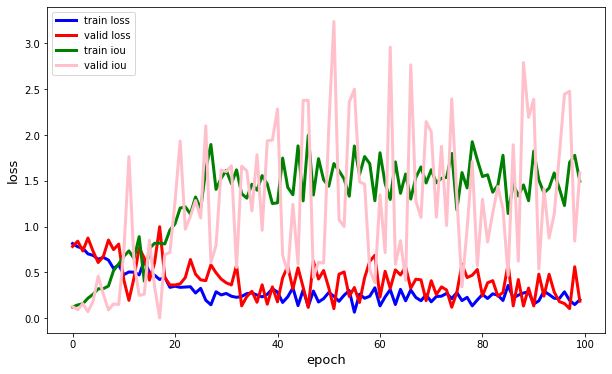

In [296]:
x = np.arange(epochs)

fig = plt.figure(figsize=(10, 6))
plt.plot(x, train_loss_history, label='train loss', lw=3, color='blue')
plt.plot(x, valid_loss_history, label='valid loss', lw=3, color='red')
plt.plot(x, train_iou_history, label='train iou', lw=3, color='green')
plt.plot(x, valid_iou_history, label='valid iou', lw=3, color='pink')
plt.xlabel('epoch', fontsize=13)
plt.ylabel('loss',fontsize=13)
plt.legend()
plt.show()

In [297]:
unet.eval()


with torch.no_grad():
    test_loss_dsc = []
    for img, mask, in testLoader:
        img, mask, = img.to(device), mask.to(device)
        mask_pred = unet(img)
        # class_pred = torch.argmax(label_pred, dim=1)
        # class_true = torch.argmax(label, dim=1)
        # correct = torch.flatten(class_pred == class_true)
        
        
        # mask_pred = torch.unsqueeze(torch.unsqueeze(torch.unsqueeze(correct, dim=1),dim=2), dim=3) * mask_pred
        loss = dsc(mask_pred, mask)
        test_loss_dsc.append(loss.item())
        
        
    print("test's dsc:", np.mean(test_loss_dsc))

test's dsc: 1.116083126140471


In [301]:
def showRes(img, mask_pred, mask):
    img, mask = img.detach().detach().cpu().numpy(), mask.detach().cpu().numpy()
    # # label = label.detach().cpu().numpy()
    # # mask_pred, label_pred = mask_pred.detach().cpu().numpy(), label_pred.cpu().numpy()
    mask_pred = np.round(mask_pred)
    # # label_pred = np.argmax(label_pred, axis=0)
    # # label_pred = label_pred.flatten()
    
    # # label = np.argmax(label, axis=0)
    # # label = label.flatten()
    
    
    fig, ax = plt.subplots(2, 2, figsize=(6, 6))
    ax[0, 0].imshow(img[0])
    ax[0, 0].set_title('image')
    ax[0, 1].imshow(mask[0], cmap='gray')
    # ax[0, 1].set_title('gt ' + classes[label[0]])
    
    ax[1, 0].imshow(img[0])
    ax[1, 0].set_title('image')
    ax[1, 1].imshow(mask_pred[0], cmap='gray')
    # ax[1, 1].set_title('pred ' + classes[label_pred[0]])
 

In [302]:
def show_batch(img, pred, mask):
    mask_pred= pred
    for i in range(img.size()[0]):
        showRes(img[i], mask_pred[i], mask[i])

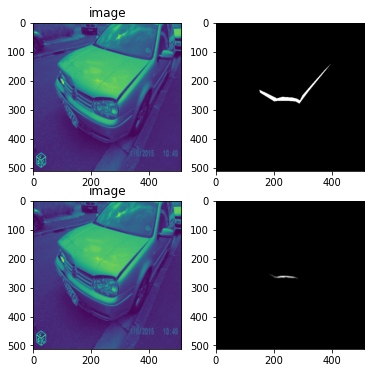

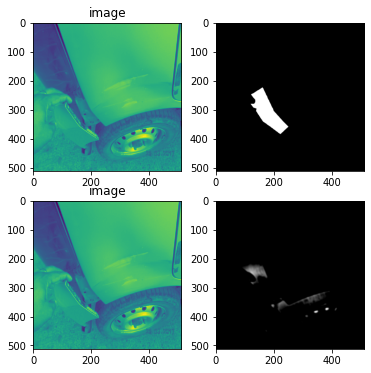

In [311]:
with torch.no_grad():
    for img, mask in testLoader:
        img, mask = img.to(device), mask.to(device)
        pred = unet(img).detach().cpu()
        show_batch(img, pred, mask)
        break